Saving download (4).jpeg to download (4) (2).jpeg
1/1 [==============================] - 0s 478ms/step
Predicted Food: banana, Estimated Calories: 105 kcal


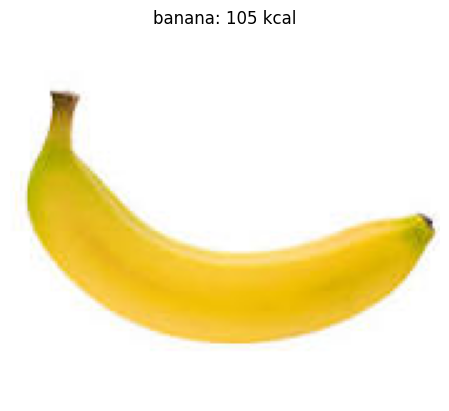

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os
from PIL import Image

# Load pre-trained model
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5")
])
model.build([None, 224, 224, 3])

def predict_and_estimate_calories(img_path, model):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    # Decode the predictions (replace with actual decoding logic)
    # For demonstration, let's assume the model predicts a banana
    class_label = "banana"  # Replace with actual decoding logic

    # Expanded calorie dictionary
    calorie_dict = {
        'apple': 95,
        'banana': 105,
        'carrot': 25,
        'orange': 45,
        'strawberry': 33,
        'grape': 69,
        'watermelon': 30,
        'avocado': 322,
        'broccoli': 34,
        'tomato': 18,
        # ... add more items
    }
    calories = calorie_dict.get(class_label, 'Unknown')

    return class_label, calories

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    class_label, calories = predict_and_estimate_calories(img_path, model)
    print(f"Predicted Food: {class_label}, Estimated Calories: {calories} kcal")

    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{class_label}: {calories} kcal")
    plt.show()